<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/BME511/SpikeSorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spike sorting using PCA for dimensionality reduction

In [1]:
import numpy as np
import pylab as pl
from scipy import io

dat = io.loadmat('SpikeSorting.mat', squeeze_me=True)

In [2]:
x = dat['voltage']
spikes = dat['spikes']

Nspikes = spikes.shape[0]
N = 70
waveforms = np.zeros((Nspikes, N))

for k, spike in enumerate(spikes):
    waveforms[k, :] = x[spike:(spike + N)]

    

In [3]:
waveforms = waveforms.astype(float)
waveforms -= waveforms.mean(axis=0)

In [4]:
C = np.cov(waveforms.T)

In [5]:
C.shape

(70, 70)

In [6]:
C1 = 1/Nspikes * np.dot(waveforms.T, waveforms)

In [7]:
C1.shape

(70, 70)

In [8]:
eigvals, Q = np.linalg.eigh(C)
eigvals1, Q1 = np.linalg.eigh(C1)

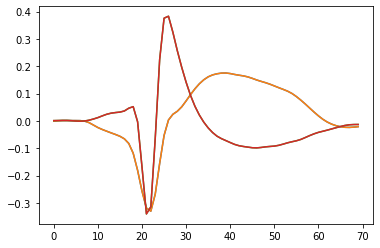

In [9]:
pl.plot(Q[:, -1])
pl.plot(Q1[:, -1])
pl.plot(Q[:, -2])
pl.plot(Q1[:, -2])

In [10]:
q1 = Q[:, -1]
q2 = Q[:, -2]

a = np.dot(waveforms, q1)
b = np.dot(waveforms, q2)

Text(0, 0.5, 'b')

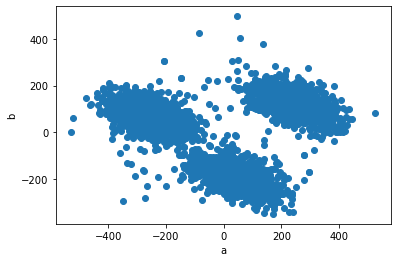

In [11]:
pl.plot(a, b, 'o')
pl.xlabel('a')
pl.ylabel('b')

# Clustering by hand

- Seems like for ```b < -60```, we have one cluster -- let's call that cluster 0.
- For ```b > -60```, we have two cluster, one with postive ```a``` values (calling it cluster 2 below) and one with negative (calling it cluster 1 below).

In [12]:
clusterlabel = np.zeros(Nspikes)
clusterlabel[b > -60] = 1
clusterlabel[np.logical_and(b > -60, a > 0)] = 2

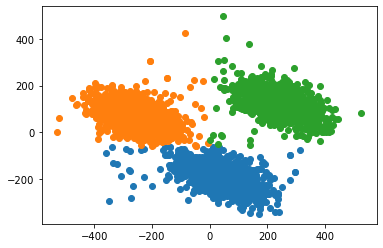

In [13]:
for k in np.arange(3):
    pl.plot(a[clusterlabel == k], b[clusterlabel == k], 'o')

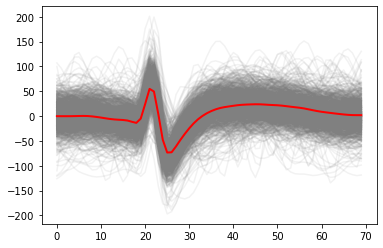

In [14]:
cluster0plot = pl.plot(waveforms[clusterlabel == 0, :].T, color=[0.5, 0.5, 0.5], alpha=0.1)
pl.plot(a[clusterlabel == 0].mean() * q1 + b[clusterlabel == 0].mean() * q2, 'r', linewidth=2)

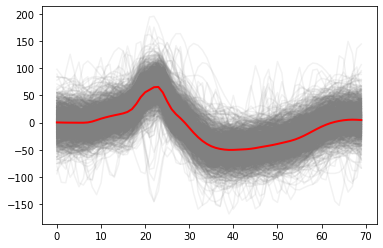

In [15]:
cluster1plot = pl.plot(waveforms[clusterlabel == 1, :].T, color=[0.5, 0.5, 0.5], alpha=0.1)
pl.plot(a[clusterlabel == 1].mean() * q1 + b[clusterlabel == 1].mean() * q2, 'r', linewidth=2)

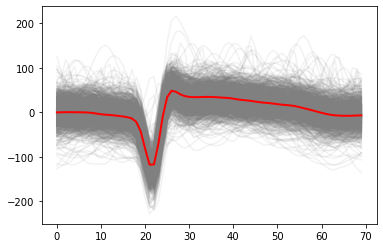

In [16]:
cluster2plot = pl.plot(waveforms[clusterlabel == 2, :].T, color=[0.5, 0.5, 0.5], alpha=0.1)
pl.plot(a[clusterlabel == 2].mean() * q1 + b[clusterlabel == 2].mean() * q2, 'r', linewidth=2)

## Clustering by Gaussian Mixture Modeling

In [17]:
from sklearn import mixture

In [18]:
X = np.stack((a, b), axis=1)

Log-likelihood = -12.168030104536479, AIC = 80294.32656952261


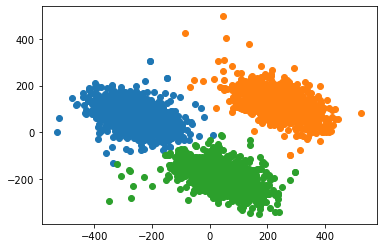

In [19]:
ncomps = 3
model = mixture.GaussianMixture(n_components=ncomps)
y = model.fit_predict(X)
print(f'Log-likelihood = {model.score(X)}, AIC = {model.aic(X)}')
for k in range(ncomps):
    pl.plot(X[y==k, 0], X[y==k, 1], 'o')